# 1 - Leitura e Tratamento dos Dados

## Importando dados

In [ ]:
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

In [ ]:
uri = 'https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json'
dados = pd.read_json(uri)
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## Verificando o conteúdo das primeiras colunas

In [ ]:
dados[['customerID', 'Churn']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


In [ ]:
print(dados.customerID.value_counts())
print(dados.Churn.value_counts())

0002-ORFBO    1
6614-VBEGU    1
6637-KYRCV    1
6635-MYYYZ    1
6635-CPNUN    1
             ..
3374-TTZTK    1
3374-PZLXD    1
3374-LXDEV    1
3373-YZZYM    1
9995-HOTOH    1
Name: customerID, Length: 7267, dtype: int64
No     5174
Yes    1869
        224
Name: Churn, dtype: int64


Há uma categoria sem label na coluna Churn. As observações serão removidas.


In [ ]:
dados = dados.query('Churn != ""')
dados.reset_index(drop=True, inplace=True)
dados.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## Normalizando os nós json

In [ ]:
dados_customer = pd.json_normalize(dados.customer)
dados_customer.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9


In [ ]:
dados_phone = pd.json_normalize(dados.phone)
dados_phone.head(2)

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes


In [ ]:
dados_internet = pd.json_normalize(dados.internet)
dados_internet.head(2)

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes


In [ ]:
dados_account = pd.json_normalize(dados.account)
dados_account.head(2)

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4


### Concatenando as colunas normalizadas

In [ ]:
def normalizar(dados):
    json_normalizado = pd.DataFrame()
    for coluna in dados.columns[2:]:
        json_normalizado = pd.concat([json_normalizado, pd.json_normalize(dados[coluna])], axis='columns')

    return pd.concat([dados[['customerID', 'Churn']], json_normalizado], axis='columns')

In [ ]:
dados_normalizados = normalizar(dados=dados)
dados_normalizados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Traduzindo colunas

In [ ]:
rename = {
    'customerID':'id_cliente',
    'Churn':'churn',
    'gender':'genero',
    'SeniorCitizen':'idoso',
    'Partner':'possui_parceiro',
    'Dependents':'possui_dependentes',
    'tenure':'meses_contrato',
    'PhoneService':'assina_telefone',
    'MultipleLines':'linhas_multiplas',
    'InternetService':'aasinatura_provedor_internet',
    'OnlineSecurity':'assinatura_seguranca',
    'OnlineBackup':'assinatura_backup',
    'DeviceProtection':'assinatura_protecao_dispositivo',
    'TechSupport':'assinatura_suporte_tecnico',
    'StreamingTV':'assinatura_tv_cabo',
    'StreamingMovies':'assinatura_streaming_filmes',
    'Contract':'tipo_contrato',
    'PaperlessBilling':'fatura_online',
    'PaymentMethod':'forma_pagamento',
    'Charges.Monthly':'valor_fatura_mensal',
    'Charges.Total':'valor_total_pago'
}

dados_normalizados = dados_normalizados.rename(columns=rename)
dados_normalizados.head(2)

,id_cliente,churn,genero,idoso,possui_parceiro,possui_dependentes,meses_contrato,assina_telefone,linhas_multiplas,aasinatura_provedor_internet,assinatura_seguranca,assinatura_backup,assinatura_protecao_dispositivo,assinatura_suporte_tecnico,assinatura_tv_cabo,assinatura_streaming_filmes,tipo_contrato,fatura_online,forma_pagamento,valor_fatura_mensal,valor_total_pago
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


## Análise inconsistência nos dados

In [ ]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id_cliente                       7043 non-null   object 
 1   churn                            7043 non-null   object 
 2   genero                           7043 non-null   object 
 3   idoso                            7043 non-null   int64  
 4   possui_parceiro                  7043 non-null   object 
 5   possui_dependentes               7043 non-null   object 
 6   meses_contrato                   7043 non-null   int64  
 7   assina_telefone                  7043 non-null   object 
 8   linhas_multiplas                 7043 non-null   object 
 9   aasinatura_provedor_internet     7043 non-null   object 
 10  assinatura_seguranca             7043 non-null   object 
 11  assinatura_backup                7043 non-null   object 
 12  assinatura_protecao_

In [ ]:
for coluna in dados_normalizados.columns:
    print(dados_normalizados[coluna].value_counts())
    print('---------------------------------------')

0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: id_cliente, Length: 7043, dtype: int64
---------------------------------------
No     5174
Yes    1869
Name: churn, dtype: int64
---------------------------------------
Male      3555
Female    3488
Name: genero, dtype: int64
---------------------------------------
0    5901
1    1142
Name: idoso, dtype: int64
---------------------------------------
No     3641
Yes    3402
Name: possui_parceiro, dtype: int64
---------------------------------------
No     4933
Yes    2110
Name: possui_dependentes, dtype: int64
---------------------------------------
1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
9     119
70    119
12    117
10    116
6     110
13    109
68    100
15     99
11     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23 

A variável valor_total_pago possui 11 ocorrências sem labels.

In [ ]:
dados_normalizados.query("valor_total_pago == ' '")

,id_cliente,churn,genero,idoso,possui_parceiro,possui_dependentes,meses_contrato,assina_telefone,linhas_multiplas,aasinatura_provedor_internet,assinatura_seguranca,assinatura_backup,assinatura_protecao_dispositivo,assinatura_suporte_tecnico,assinatura_tv_cabo,assinatura_streaming_filmes,tipo_contrato,fatura_online,forma_pagamento,valor_fatura_mensal,valor_total_pago
945,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1731,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1906,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2025,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2176,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2250,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2855,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3052,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3118,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4054,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


Nota-se que a coluna meses_contrato é igual 0 para os casos filtrados, portanto são clientes que ainda não pagaram nenhum valor à empresa.

In [ ]:
# Filtrando valor_total_pago vazio
dados_normalizados.query("valor_total_pago == ' '")[['meses_contrato', 'valor_fatura_mensal', 'valor_total_pago']]

,meses_contrato,valor_fatura_mensal,valor_total_pago
945,0,56.05,
1731,0,20.00,
1906,0,61.90,
2025,0,19.70,
2176,0,20.25,
2250,0,25.35,
2855,0,73.35,
3052,0,25.75,
3118,0,52.55,
4054,0,80.85,


In [ ]:
# Filtrando meses_contrato igual a zero
dados_normalizados.query("meses_contrato == 0")[['meses_contrato', 'valor_fatura_mensal', 'valor_total_pago']]

,meses_contrato,valor_fatura_mensal,valor_total_pago
945,0,56.05,
1731,0,20.00,
1906,0,61.90,
2025,0,19.70,
2176,0,20.25,
2250,0,25.35,
2855,0,73.35,
3052,0,25.75,
3118,0,52.55,
4054,0,80.85,


Como as condições retornam o mesmo resultado, podemos preencher o valor_total_pago com o valor_fatura_mensal, para meses_contrato igual a zero.

In [ ]:
selecao = dados_normalizados.query("meses_contrato == 0").index
dados_normalizados.loc[selecao, 'valor_total_pago'] = 0
dados_normalizados.query("meses_contrato == 0")[['meses_contrato', 'valor_fatura_mensal', 'valor_total_pago']]

,meses_contrato,valor_fatura_mensal,valor_total_pago
945,0,56.05,0
1731,0,20.00,0
1906,0,61.90,0
2025,0,19.70,0
2176,0,20.25,0
2250,0,25.35,0
2855,0,73.35,0
3052,0,25.75,0
3118,0,52.55,0
4054,0,80.85,0


Além disso, a coluna valor_total_pago está como tipo object e é necessário converter para float.

In [ ]:
dados_normalizados.valor_total_pago = dados_normalizados.valor_total_pago.astype('float64')
dados_normalizados.valor_total_pago.dtypes

dtype('float64')

#### Coluna de gastos diários

In [ ]:
dados_normalizados['valor_gasto_diario'] = round((dados_normalizados.valor_fatura_mensal / 30),2)
dados_normalizados[['meses_contrato', 'valor_fatura_mensal', 'valor_total_pago', 'valor_gasto_diario']]

,meses_contrato,valor_fatura_mensal,valor_total_pago,valor_gasto_diario
0,9,65.60,593.30,2.19
1,9,59.90,542.40,2.00
2,4,73.90,280.85,2.46
3,13,98.00,1237.85,3.27
4,3,83.90,267.40,2.80
...,...,...,...,...
7038,13,55.15,742.90,1.84
7039,22,85.10,1873.70,2.84
7040,2,50.30,92.75,1.68
7041,67,67.85,4627.65,2.26


# 2 - Análise Exploratória

### Bibliotecas


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('Accent')
sns.set_style('darkgrid')

### Distribuição da variável Churn

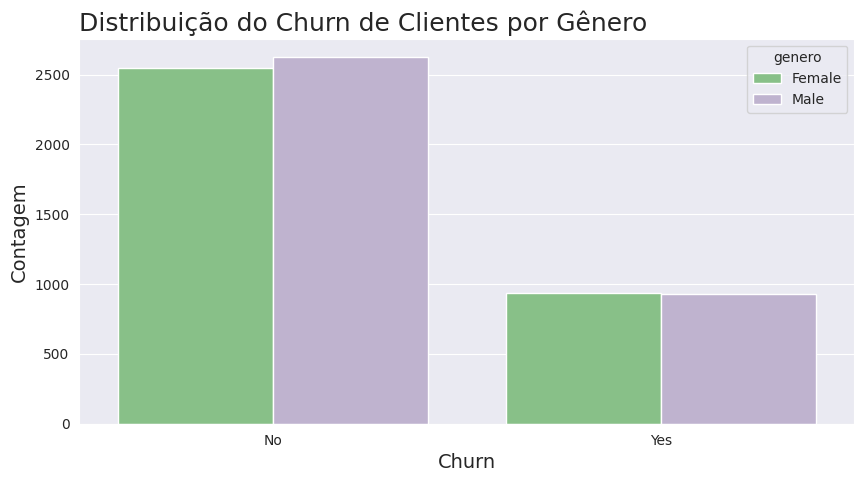

In [ ]:
ax = sns.countplot(data=dados_normalizados,
                   x='churn',
                   hue='genero')
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição do Churn de Clientes por Gênero', fontsize=18, loc='left')
ax.set_xlabel('Churn', fontsize=14)
ax.set_ylabel('Contagem', fontsize=14)
ax=ax

Nota-se que não há diferença significativa entre o churn para ambos os gêneros.

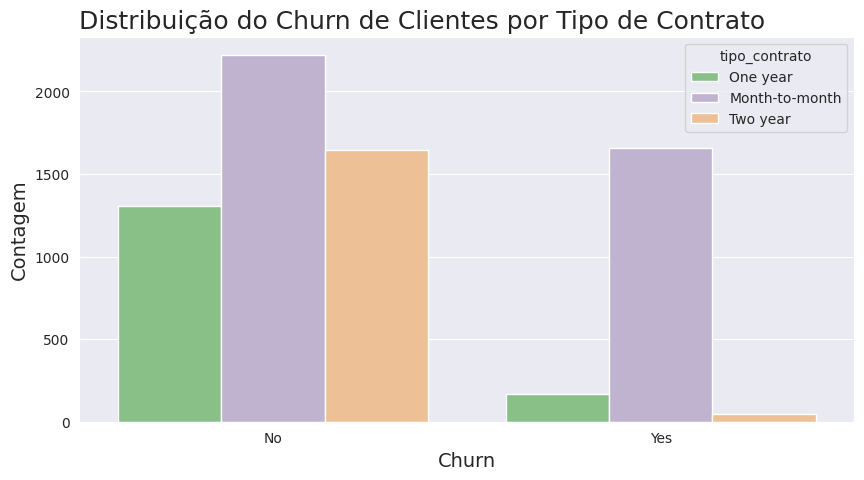

In [ ]:
ax = sns.countplot(data=dados_normalizados,
                   x='churn',
                   hue='tipo_contrato')
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição do Churn de Clientes por Tipo de Contrato', fontsize=18, loc='left')
ax.set_xlabel('Churn', fontsize=14)
ax.set_ylabel('Contagem', fontsize=14)
ax=ax

Nota-se maior cancelamento de contratos para clientes com contratos mensais.

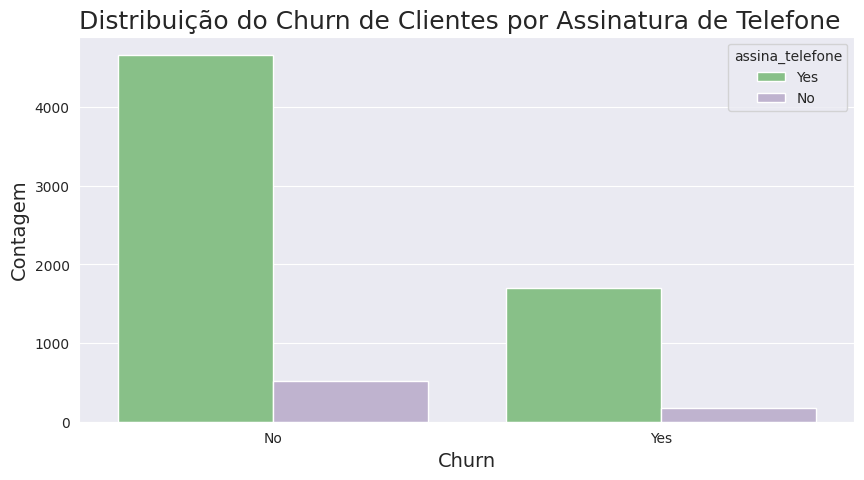

In [ ]:
ax = sns.countplot(data=dados_normalizados,
                   x='churn',
                   hue='assina_telefone')
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição do Churn de Clientes por Assinatura de Telefone', fontsize=18, loc='left')
ax.set_xlabel('Churn', fontsize=14)
ax.set_ylabel('Contagem', fontsize=14)
ax=ax

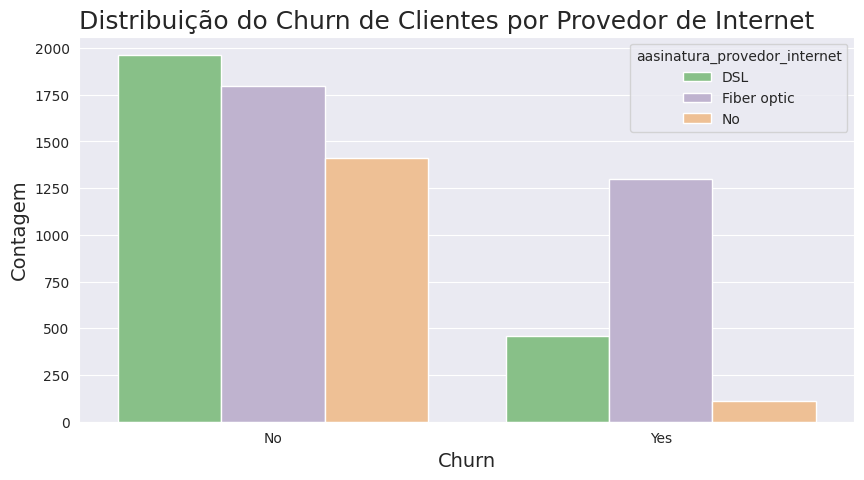

In [ ]:
ax = sns.countplot(data=dados_normalizados,
                   x='churn',
                   hue='aasinatura_provedor_internet')
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição do Churn de Clientes por Provedor de Internet', fontsize=18, loc='left')
ax.set_xlabel('Churn', fontsize=14)
ax.set_ylabel('Contagem', fontsize=14)
ax=ax

Nota-se uma maior tendência de churn para clientes com o serviço de fibra óptica.

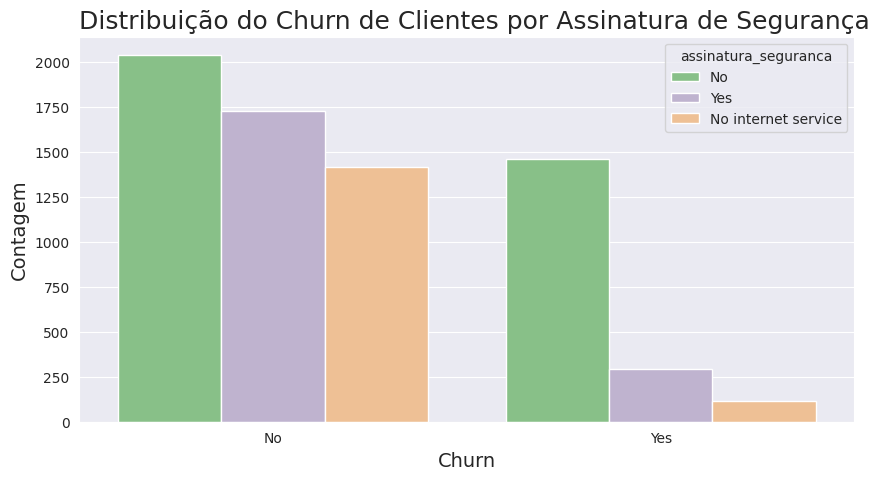

In [ ]:
ax = sns.countplot(data=dados_normalizados,
                   x='churn',
                   hue='assinatura_seguranca')
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição do Churn de Clientes por Assinatura de Segurança', fontsize=18, loc='left')
ax.set_xlabel('Churn', fontsize=14)
ax.set_ylabel('Contagem', fontsize=14)
ax=ax

Também percebe-se uma maior saída da empresa em clientes que não possuem serviço de segurança online.

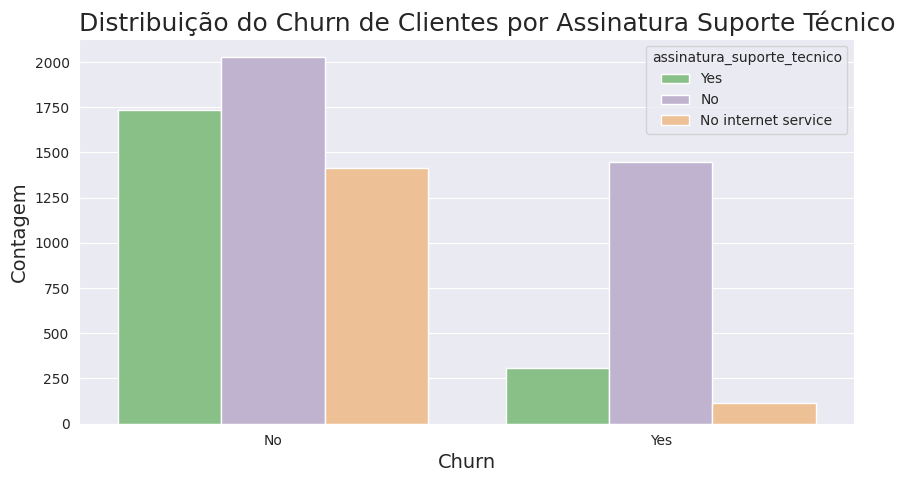

In [ ]:
ax = sns.countplot(data=dados_normalizados,
                   x='churn',
                   hue='assinatura_suporte_tecnico')
ax.figure.set_size_inches(10,5)
ax.set_title('Distribuição do Churn de Clientes por Assinatura Suporte Técnico', fontsize=18, loc='left')
ax.set_xlabel('Churn', fontsize=14)
ax.set_ylabel('Contagem', fontsize=14)
ax=ax

Assim como no serviço de segurança, a ausência do suporte técnico também está presente em maior churn.

### Churn x Valores Pagos

In [ ]:
dados_normalizados.groupby(by='churn')\
                   [['valor_fatura_mensal', 'valor_total_pago', 'valor_gasto_diario']]\
                   .agg(['mean', 'std', 'median'])\
                   .round(2)

valor_fatura_mensal               valor_total_pago                    \
                     mean    std median             mean      std   median   
churn                                                                        
No                  61.27  31.09  64.43          2549.91  2329.95  1679.52   
Yes                 74.44  24.67  79.65          1531.80  1890.82   703.55   

      valor_gasto_diario               
                    mean   std median  
churn                                  
No                  2.04  1.04   2.15  
Yes                 2.48  0.82   2.66

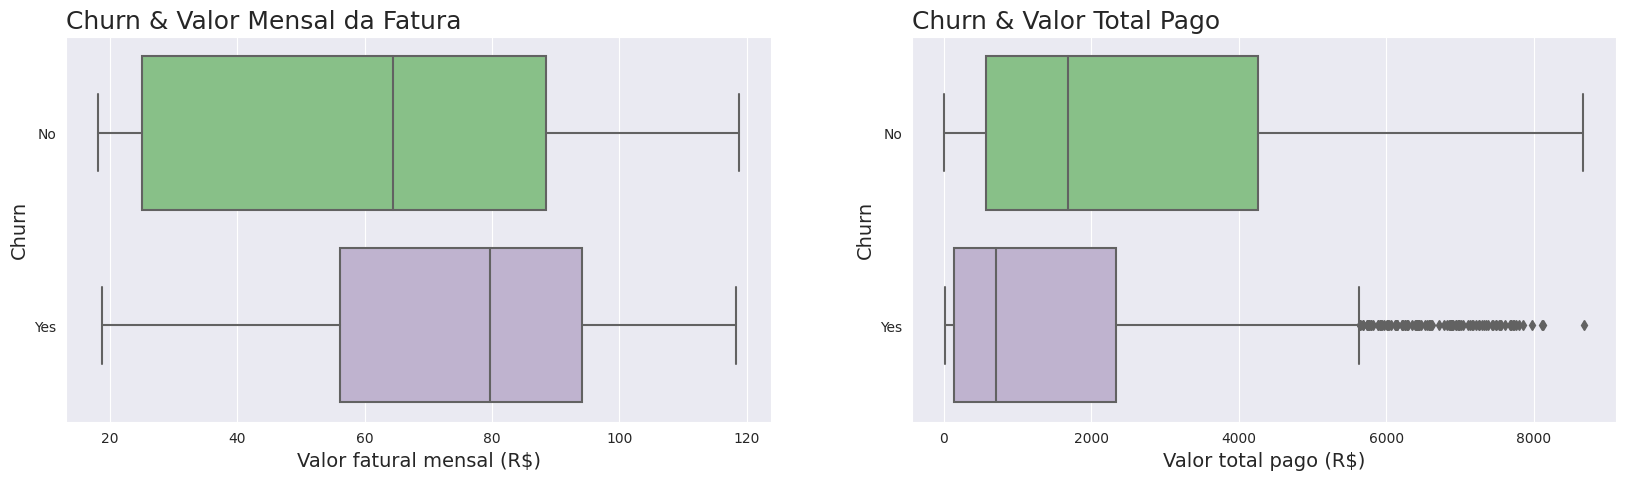

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(20,5))

sns.boxplot(x='valor_fatura_mensal',y='churn',data=dados_normalizados, ax=axs[0])
sns.boxplot(x='valor_total_pago',y='churn',data=dados_normalizados, ax=axs[1])

axs[0].set_title('Churn & Valor Mensal da Fatura', fontsize=18, loc='left')
axs[0].set_xlabel('Valor fatural mensal (R$)', fontsize=14)
axs[0].set_ylabel('Churn', fontsize=14)
axs[1].set_title('Churn & Valor Total Pago', fontsize=18, loc='left')
axs[1].set_xlabel('Valor total pago (R$)', fontsize=14)
axs[1].set_ylabel('Churn', fontsize=14)

plt.show()

Analisando em relação ao valor da fatura mensal, nota-se que os clientes que deixaram a empresa tem faturas com valores maiores e mais concentradas em **R$80,00**. Já os clientes que permancem com o contrato, possuem faturas com valores menores.<br>

Observando o valor total pago, clientes que encerraram o contrato têm um valor pago acumulado menor, indicando uma possível menor permanência com a empresa.

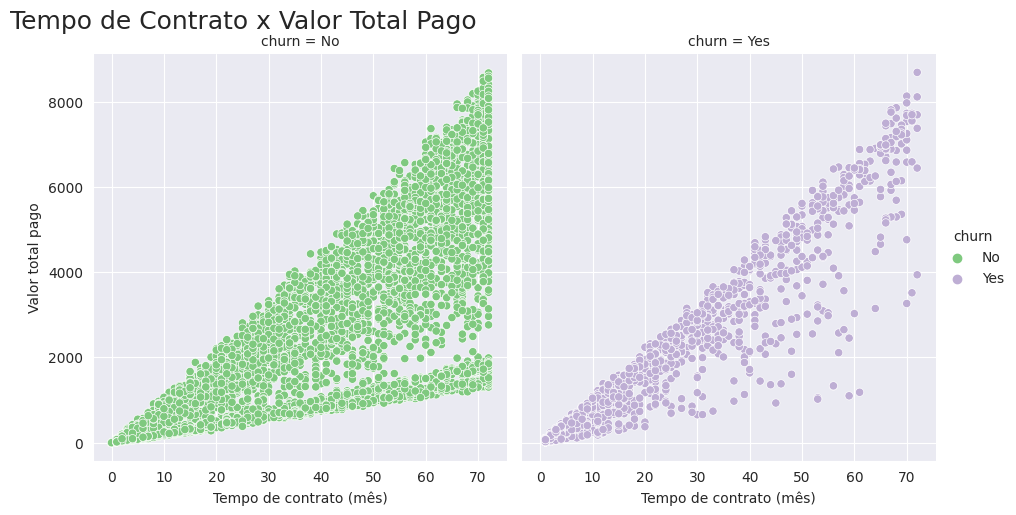

In [ ]:
ax=sns.relplot(x='meses_contrato', y='valor_total_pago', hue='churn', col='churn', data=dados_normalizados)
ax.figure.set_size_inches(10,5)
ax.fig.suptitle('Tempo de Contrato x Valor Total Pago', fontsize=18, x=0.23,y=1.02)
ax.set(xlabel='Tempo de contrato (mês)', ylabel='Valor total pago')
ax=ax

Pode-se notar que nos clientes que saíram da empresa, à medida que o tempo de contrato aumenta, há cada vez menos observações. Já na outra situação de churn, a quantidade de clientes é mais constante com o aumento de tempo.

#### Testes de Hipóteses

In [ ]:
from scipy.stats import normaltest
significancia = 0.05

Verificando a normalidade das distribuições

In [ ]:
_, pvalor_mensal = normaltest(dados_normalizados.valor_fatura_mensal)
if pvalor_mensal <= significancia:
  print(f'p_valor = {pvalor_mensal}. Hipótese nula rejeitada e a distribuição não vem de uma normal.')
else:
  print(f'p_valor = {pvalor_mensal}. Hipótese nula não rejeitada e a distribuição vem de uma normal.')

p_valor = 0.0. Hipótese nula rejeitada e a distribuição não vem de uma normal.


In [ ]:
_, pvalor_total = normaltest(dados_normalizados.valor_total_pago)
if pvalor_total <= significancia:
  print(f'p_valor = {pvalor_total}. Hipótese nula rejeitada e a distribuição não vem de uma normal.')
else:
  print(f'p_valor = {pvalor_total}. Hipótese nula não rejeitada e a distribuição vem de uma normal.')

p_valor = 2.6049140547884828e-176. Hipótese nula rejeitada e a distribuição não vem de uma normal.


In [ ]:
churn_sim_mensal = dados_normalizados.query('churn == "Yes"')['valor_fatura_mensal']
churn_nao_mensal = dados_normalizados.query('churn == "No"')['valor_fatura_mensal']

churn_sim_total = dados_normalizados.query('churn == "Yes"')['valor_total_pago']
churn_nao_total = dados_normalizados.query('churn == "No"')['valor_total_pago']

##### Teste 1 - Testar se o valor da fatura mensal dos clientes que fizeram churn é, em média, estatiscamente maior do que os clientes que não fizeram.

**H<sup>null</sup>**
> **A distribuição do valor da fatura mensal é igual para os clientes que fizeram churn e não fizeram.**

**H<sup>alt</sup>**
> **A distribuição do valor da fatura mensal é maior para os clientes que fizeram churn.**

In [ ]:
from scipy.stats import mannwhitneyu

_, pvalor_teste1 = mannwhitneyu(churn_sim_mensal, churn_nao_mensal, alternative='greater')

if pvalor_teste1 <= significancia:
  print(f'p_valor = {pvalor_teste1}. Hipótese nula rejeitada e pode-se afirmar que a mensalidade dos clientes que fizeram churn são estatisticamente superiores, a 95% de confiança.')
else:
  print(f'p_valor = {pvalor_total}. Hipótese nula não rejeitada e não se pode afirmar que as distribuições são diferentes, a 95% de confiança.')

p_valor = 1.6558138259942924e-54. Hipótese nula rejeitada e pode-se afirmar que a mensalidade dos clientes que fizeram churn são estatisticamente superiores, a 95% de confiança.


##### Teste 2 - Testar se o valor total pago pelos clientes que fizeram churn é, em média, estatiscamente menor do que os clientes que não fizeram.

**H<sup>null</sup>**
> **A distribuição do valor total pago é igual para os clientes que fizeram churn e não fizeram.**

**H<sup>alt</sup>**
> **A distribuição do valor total pago é menor para os clientes que fizeram churn.**

In [ ]:
_, pvalor_teste2 = mannwhitneyu(churn_sim_total, churn_nao_total, alternative='less')

if pvalor_teste2 <= significancia:
  print(f'p_valor = {pvalor_teste2}. Hipótese nula rejeitada e pode-se afirmar que o valor total pago pelos clientes que fizeram churn são estatisticamente menores, a 95% de confiança.')
else:
  print(f'p_valor = {pvalor_teste2}. Hipótese nula não rejeitada e não se pode afirmar que as distribuições são diferentes, a 95% de confiança.')

p_valor = 2.842516933103657e-83. Hipótese nula rejeitada e pode-se afirmar que o valor total pago pelos clientes que fizeram churn são estatisticamente menores, a 95% de confiança.


In [ ]:
dados_normalizados[['id_cliente', 'churn', 'genero', 'idoso', 'possui_parceiro', 'possui_dependentes', 'tipo_contrato', 'valor_fatura_mensal', 'valor_total_pago']].head()

,id_cliente,churn,genero,idoso,possui_parceiro,possui_dependentes,tipo_contrato,valor_fatura_mensal,valor_total_pago
0,0002-ORFBO,No,Female,0,Yes,Yes,One year,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,Month-to-month,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,Month-to-month,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,Month-to-month,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,Month-to-month,83.9,267.40


***

### Churn x Dependentes/Parceiros/Faixa etária

Como foi verificado que o valor da fatura possui relação com a taxa de churn, podemos verificar como a presença de dependentes, parceiro e idade afetam.

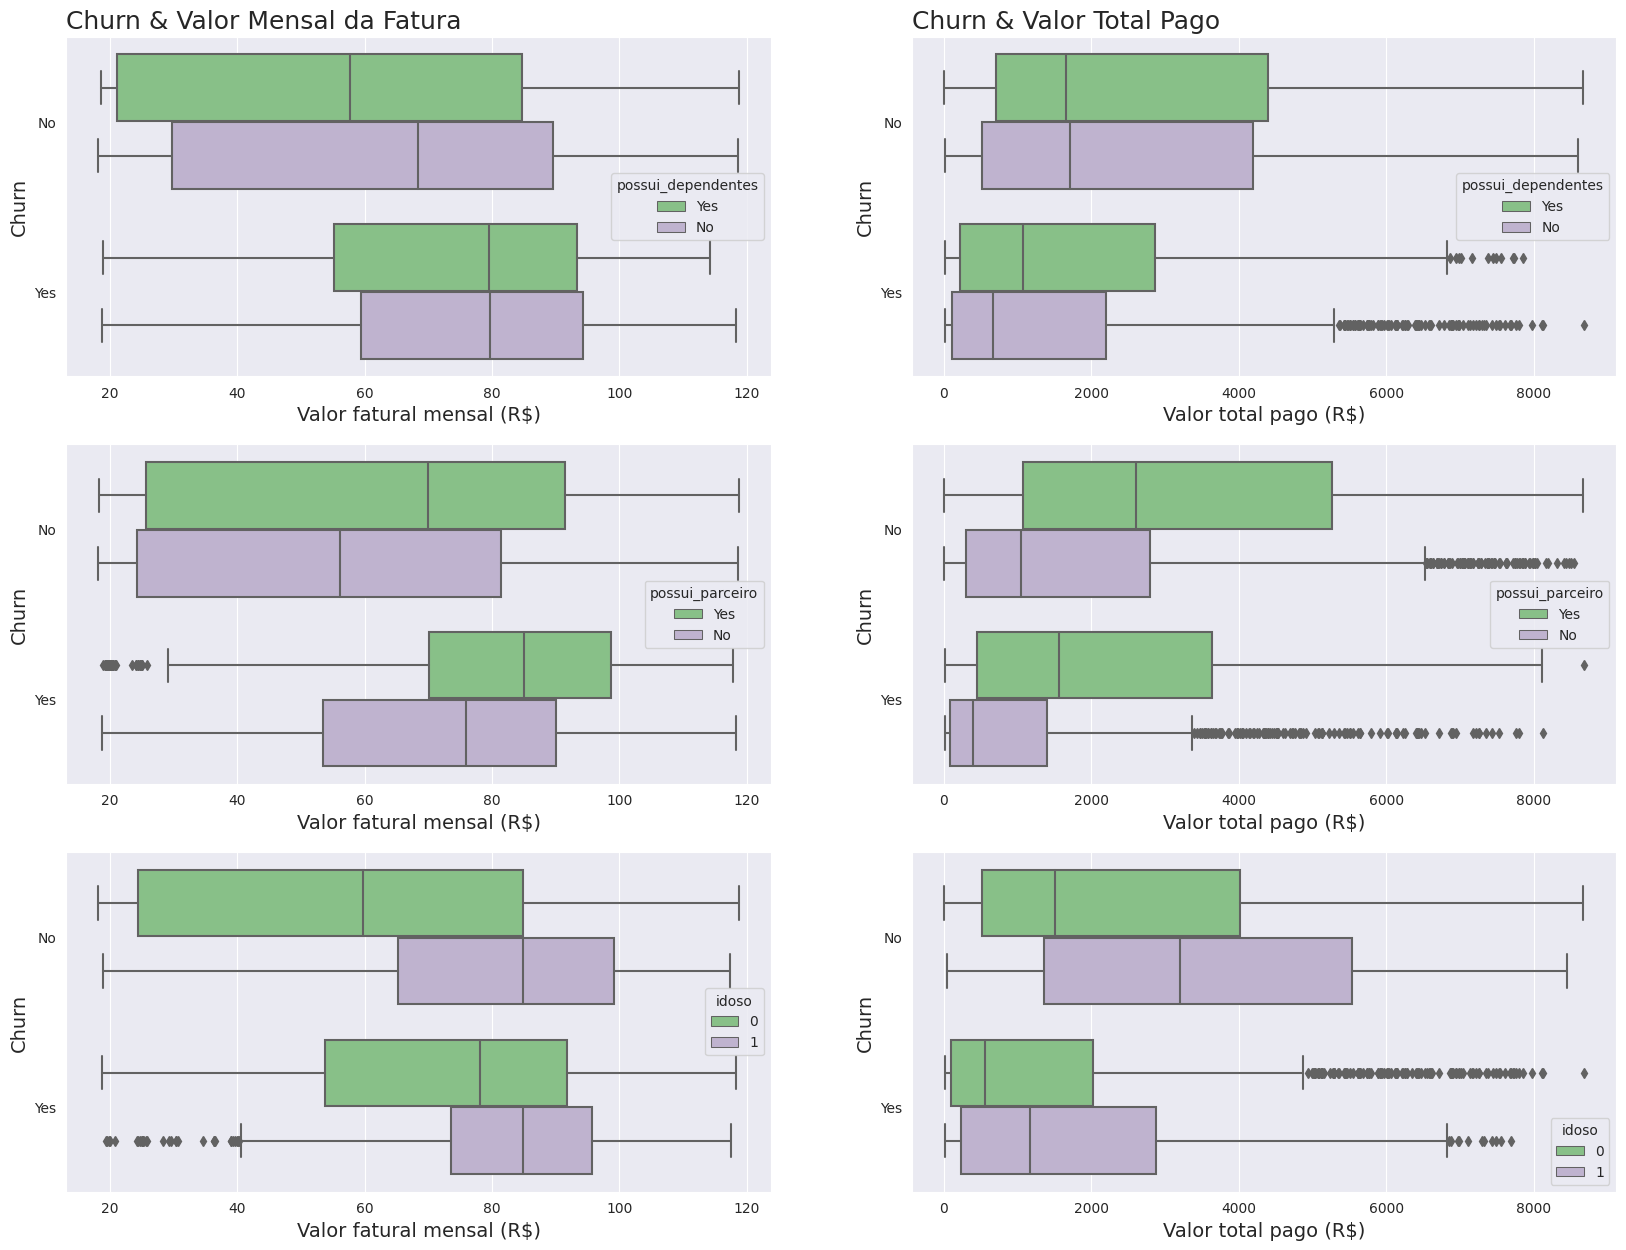

In [ ]:
fig, axs = plt.subplots(3,2,figsize=(20,15))

sns.boxplot(x='valor_fatura_mensal',y='churn',hue='possui_dependentes',data=dados_normalizados, ax=axs[0,0])
sns.boxplot(x='valor_total_pago',y='churn',hue='possui_dependentes',data=dados_normalizados, ax=axs[0,1])
sns.boxplot(x='valor_fatura_mensal',y='churn',hue='possui_parceiro',data=dados_normalizados, ax=axs[1,0])
sns.boxplot(x='valor_total_pago',y='churn',hue='possui_parceiro',data=dados_normalizados, ax=axs[1,1])
sns.boxplot(x='valor_fatura_mensal',y='churn',hue='idoso',data=dados_normalizados, ax=axs[2,0])
sns.boxplot(x='valor_total_pago',y='churn',hue='idoso',data=dados_normalizados, ax=axs[2,1])

axs[0,0].set_title('Churn & Valor Mensal da Fatura', fontsize=18, loc='left')
axs[0,0].set_xlabel('Valor fatural mensal (R$)', fontsize=14)
axs[0,0].set_ylabel('Churn', fontsize=14)
axs[0,1].set_title('Churn & Valor Total Pago', fontsize=18, loc='left')
axs[0,1].set_xlabel('Valor total pago (R$)', fontsize=14)
axs[0,1].set_ylabel('Churn', fontsize=14)
axs[1,0].set_xlabel('Valor fatural mensal (R$)', fontsize=14)
axs[1,0].set_ylabel('Churn', fontsize=14)
axs[1,1].set_xlabel('Valor total pago (R$)', fontsize=14)
axs[1,1].set_ylabel('Churn', fontsize=14)
axs[2,0].set_xlabel('Valor fatural mensal (R$)', fontsize=14)
axs[2,0].set_ylabel('Churn', fontsize=14)
axs[2,1].set_xlabel('Valor total pago (R$)', fontsize=14)
axs[2,1].set_ylabel('Churn', fontsize=14)

plt.show()

Entre as features testadas, a presença de dependentes não causa grande impacto sobre as faturas pagas, ao contrário de clientes com parceiros e idosos. Idosos e casais tendem a permanecer mais tempo em casa e consequentemente assistir mais à tv.

### Correlação

Entre as variáveis numéricas da base de dados, podemos analisar as correlações entre o tempo de contrato e os valores pagos.

In [ ]:
correlacoes = dados_normalizados[['meses_contrato', 'valor_fatura_mensal', 'valor_total_pago', 'valor_gasto_diario']].corr().round(3)
correlacoes.round(3).style.format('{:.3f}')\
                          .applymap(lambda x: f"color: {'darkblue' if x>=0.8 and x<1 else 'white'}", subset=['meses_contrato',	'valor_fatura_mensal',	'valor_total_pago',	'valor_gasto_diario'])\
                          .applymap(lambda x: f"font-weight: {'bold' if x>=0.8 and x<1 else 'normal'}", subset=['meses_contrato',	'valor_fatura_mensal',	'valor_total_pago',	'valor_gasto_diario'])

,meses_contrato,valor_fatura_mensal,valor_total_pago,valor_gasto_diario
meses_contrato,1.000,0.248,0.826,0.248
valor_fatura_mensal,0.248,1.000,0.651,1.000
valor_total_pago,0.826,0.651,1.000,0.651
valor_gasto_diario,0.248,1.000,0.651,1.000


Pela tabela, podemos observar que as variáveis tempo de contrato e valor total pago possuem uma correlação mais forte.

https://cursos.alura.com.br/course/machine-learning-classificacao-tras-panos/task/107926  - dados desbalanceados

# 3 - Modelo de Classificação de Churn

## Feature engineering

### Encoding das variáveis categóricas

In [ ]:
dados_normalizados.head()

,id_cliente,churn,genero,idoso,possui_parceiro,possui_dependentes,meses_contrato,assina_telefone,linhas_multiplas,aasinatura_provedor_internet,assinatura_seguranca,assinatura_backup,assinatura_protecao_dispositivo,assinatura_suporte_tecnico,assinatura_tv_cabo,assinatura_streaming_filmes,tipo_contrato,fatura_online,forma_pagamento,valor_fatura_mensal,valor_total_pago,valor_gasto_diario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [ ]:
map_geral = {
    'Yes':1,
    'No':0,
    'Male':1,
    'Female':0
}

dados_map_geral = dados_normalizados[['churn','genero','possui_parceiro','possui_dependentes','assina_telefone','fatura_online']].replace(map_geral)
dummies = pd.get_dummies(dados_normalizados.drop(['id_cliente','churn','possui_parceiro','possui_dependentes','assina_telefone','fatura_online','genero'], axis='columns'))
dados_encoding = pd.concat([dados_map_geral, dummies], axis='columns')
dados_encoding.head()

,churn,genero,possui_parceiro,possui_dependentes,assina_telefone,fatura_online,idoso,meses_contrato,valor_fatura_mensal,valor_total_pago,valor_gasto_diario,linhas_multiplas_No,linhas_multiplas_No phone service,linhas_multiplas_Yes,aasinatura_provedor_internet_DSL,aasinatura_provedor_internet_Fiber optic,aasinatura_provedor_internet_No,assinatura_seguranca_No,assinatura_seguranca_No internet service,assinatura_seguranca_Yes,assinatura_backup_No,assinatura_backup_No internet service,assinatura_backup_Yes,assinatura_protecao_dispositivo_No,assinatura_protecao_dispositivo_No internet service,assinatura_protecao_dispositivo_Yes,assinatura_suporte_tecnico_No,assinatura_suporte_tecnico_No internet service,assinatura_suporte_tecnico_Yes,assinatura_tv_cabo_No,assinatura_tv_cabo_No internet service,assinatura_tv_cabo_Yes,assinatura_streaming_filmes_No,assinatura_streaming_filmes_No internet service,assinatura_streaming_filmes_Yes,tipo_contrato_Month-to-month,tipo_contrato_One year,tipo_contrato_Two year,forma_pagamento_Bank transfer (automatic),forma_pagamento_Credit card (automatic),forma_pagamento_Electronic check,forma_pagamento_Mailed check
0,0,0,1,1,1,1,0,9,65.6,593.30,2.19,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,0,9,59.9,542.40,2.00,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1
2,1,1,0,0,1,1,0,4,73.9,280.85,2.46,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
3,1,1,1,0,1,1,1,13,98.0,1237.85,3.27,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
4,1,0,1,0,1,1,1,3,83.9,267.40,2.80,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1


### Verificando existência de features com correlações perfeitas entre si

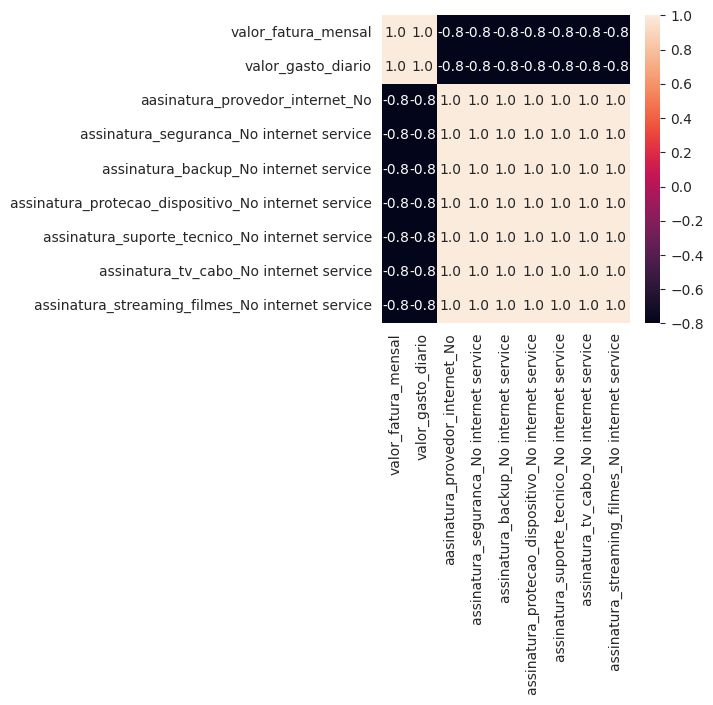

In [ ]:
X = dados_encoding.drop('churn', axis='columns')
y = dados_encoding.churn

matriz_correlacao = X.corr().round(1)
matriz_correlacao_filtro = matriz_correlacao[matriz_correlacao > 0.99].sum()
matriz_correlacao_filtro = matriz_correlacao_filtro[matriz_correlacao_filtro > 1].index
matriz_correlacao_2 = X[matriz_correlacao_filtro].corr().round(1)
plt.figure(figsize=(4,4))
ax = sns.heatmap(matriz_correlacao_2,
                 annot=True,
                 fmt = '.1f')
ax=ax

In [ ]:
X_novo = X.drop(['valor_gasto_diario',
                 'assinatura_seguranca_No internet service',
                 'assinatura_backup_No internet service',
                 'assinatura_protecao_dispositivo_No internet service',
                 'assinatura_suporte_tecnico_No internet service',
                 'assinatura_tv_cabo_No internet service',
                 'assinatura_streaming_filmes_No internet service'],
                 axis=1)

## Treino de modelos de classificação

### Modelo Baseline

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
import numpy as np

seed = 100
np.random.seed(seed)

X_treino, X_teste, y_treino, y_teste = train_test_split(X_novo, y, test_size=0.3, random_state=seed, stratify=y)

modelo_dummy_baseline = DummyClassifier(strategy='most_frequent')
modelo_dummy_baseline.fit(X_treino, y_treino)
previsoes_dummy = modelo_dummy_baseline.predict(X_teste)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print(confusion_matrix(y_teste, previsoes_dummy))
print('Acurácia modelo Dummy de Baseline:', accuracy_score(y_teste, previsoes_dummy).round(4))
print('Precisão modelo Dummy de Baseline:', precision_score(y_teste, previsoes_dummy).round(4))

[[1552    0]
 [ 561    0]]
Acurácia modelo Dummy de Baseline: 0.7345
Precisão modelo Dummy de Baseline: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
import warnings

# Remove as linhas de future warning na saída do código
warnings.filterwarnings("ignore", category=FutureWarning)

seed = 100
np.random.seed(seed)

# Cria o scaler e o modelo
normalizar = StandardScaler()
modelo_knn = KNeighborsClassifier(metric='euclidean')

# Aplica o scaler e o modelo ao pipeline
pipeline_knn = Pipeline([('normalizacao', normalizar), ('classificador', modelo_knn)])

# Define KFold
cv = StratifiedKFold(n_splits=10, shuffle=True)

# Faz a validação cruzada
resultado = cross_validate(pipeline_knn, X_novo, y, cv=cv, return_train_score=True)
media_treino = resultado['train_score'].mean()
media_teste = resultado['test_score'].mean()
desv_pad_treino = resultado['train_score'].std()
desv_pad_teste = resultado['test_score'].std()
print('Acurácia média treino: %.2f%%' % (media_treino*100))
print('Acurácia média teste: %.2f%%' % (media_teste*100))
print('Intervalo da acurácia treino: [%.2f%%, %.2f%%]' % ((media_treino - 2 * desv_pad_treino) * 100, (media_treino + 2 * desv_pad_treino) * 100))
print('Intervalo da acurácia teste: [%.2f%%, %.2f%%]' % ((media_teste - 2 * desv_pad_teste) * 100, (media_teste + 2 * desv_pad_teste) * 100))

Acurácia média treino: 83.58%
Acurácia média teste: 75.39%
Intervalo da acurácia treino: [83.05%, 84.11%]
Intervalo da acurácia teste: [72.90%, 77.89%]


In [ ]:
# Função para mostrar o resultado do cross_validation
def resultado_cross_val(resultado):
    media_treino = resultado['train_score'].mean()
    media_teste = resultado['test_score'].mean()
    desv_pad_treino = resultado['train_score'].std()
    desv_pad_teste = resultado['test_score'].std()
    print('Acurácia média treino: %.2f%%' % (media_treino*100))
    print('Acurácia média teste: %.2f%%' % (media_teste*100))
    print('Intervalo da acurácia treino: [%.2f%%, %.2f%%]' % ((media_treino - 2 * desv_pad_treino) * 100, (media_treino + 2 * desv_pad_treino) * 100))
    print('Intervalo da acurácia teste: [%.2f%%, %.2f%%]' % ((media_teste - 2 * desv_pad_teste) * 100, (media_teste + 2 * desv_pad_teste) * 100))

### Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

seed=100
np.random.seed(seed)

# Define KFold
cv = StratifiedKFold(n_splits=10, shuffle=True)

# Instacia o modelo
modelo_tree = DecisionTreeClassifier(criterion='gini', random_state=seed)

# Faz a validação cruzada
resultado = cross_validate(modelo_tree, X_novo, y, return_train_score=True ,cv=cv)

# Retorna o resultado da validação cruzada
resultado_cross_val(resultado)

Acurácia média treino: 99.76%
Acurácia média teste: 72.48%
Intervalo da acurácia treino: [99.72%, 99.81%]
Intervalo da acurácia teste: [70.04%, 74.93%]


Há um forte indício de overfitting, conforme os resultados obtidos.

### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

seed = 100
np.random.seed(seed)

cv = StratifiedKFold(n_splits=10, shuffle=True)
modelo_random = RandomForestClassifier(max_depth=3, random_state=seed)
resultado = cross_validate(modelo_random, X_novo, y, return_train_score=True, cv=cv)

resultado_cross_val(resultado)


Acurácia média treino: 78.60%
Acurácia média teste: 78.30%
Intervalo da acurácia treino: [78.10%, 79.11%]
Intervalo da acurácia teste: [76.31%, 80.30%]


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

median_abs = np.abs(np.median(X))
seed=100
np.random.seed(seed)

cv = StratifiedKFold(n_splits=10, shuffle=True)
modelo_nb = BernoulliNB(binarize=median_abs)
resultado = cross_validate(modelo_nb, X_novo, y, cv=cv, return_train_score=True)
resultado_cross_val(resultado)

Acurácia média treino: 74.70%
Acurácia média teste: 74.68%
Intervalo da acurácia treino: [74.42%, 74.98%]
Intervalo da acurácia teste: [71.95%, 77.42%]


## Otimização do modelo random forest

### Seleção de melhores features - verificar se vale a pena manter isso

In [ ]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# seed=100
# np.random.seed(seed)

# # Instancia seletor de features e modelo
# selecao_features = SelectKBest(chi2, k=25)
# modelo_random_selecao_features = RandomForestClassifier(max_depth=3, random_state=seed)

# # Define a execução do pipeline
# pipeline_random_selecao_features = Pipeline([('selecionador_features', selecao_features), ('classificador', modelo_random_selecao_features)])

# # Cross-validation
# cv=StratifiedKFold(n_splits=10, shuffle=True)
# resultado = cross_validate(pipeline_random_selecao_features, X_novo, y, cv=cv, return_train_score=True)

# # Resultado
# resultado_cross_val(resultado)


Com 9 features a menos, o modelo mantém um resultado ainda satisfatório.

In [ ]:
# def rodar_modelo(quant_features):

#   # Declaração de variáveis
#   df = pd.DataFrame()
#   precisao_treino = []
#   precisao_teste = []
#   features = []

#   # Laço de repetição
#   for quantidade in quant_features:

#     seed = 100
#     np.random.seed(seed)

#     # Instaciamento do seletor de features e algoritmo random forest
#     selecao_features = SelectKBest(chi2, k=quantidade)
#     modelo_random_selecao_features = RandomForestClassifier(max_depth=3, random_state=seed)

#     # Define a execução do pipeline
#     pipeline_random_selecao_features = Pipeline([('selecionador_features', selecao_features), ('classificador', modelo_random_selecao_features)])

#     # Cross-validation
#     cv = StratifiedKFold(n_splits=10, shuffle=True)
#     resultado = cross_validate(pipeline_random_selecao_features, X_novo, y, cv=cv, return_train_score=True)

#     # Criação do dataframe com os resultados
#     precisao_treino.append(resultado['train_score'].mean().round(4))
#     precisao_teste.append(resultado['test_score'].mean().round(4))
#     features.append(quantidade)

#   df['precisao_treino'] = precisao_treino
#   df['precisao_teste'] = precisao_teste
#   df['quant_features'] = features
#   return df

In [ ]:
# lista = [5,10,15,20,25,30,34]
# resultados = rodar_modelo(lista)

In [ ]:
# import matplotlib.pyplot as plt

# ax = sns.lineplot(data=resultados, x='quant_features', y='precisao_treino', marker='o')
# fig = ax.get_figure()
# fig.set_size_inches(10, 5)
# ax.set_title('Precisão com Dados de Treino x Número de Features', loc='left', fontsize=18)
# ax.set_xlabel('Núm. de features', fontsize=14)
# ax.set_ylabel('Precisão', fontsize=14)

# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# fig, axes = plt.subplots(1, 2, figsize=(15, 4))  # 1 linha, 2 colunas
# ax1 = sns.lineplot(data=resultados, x='quant_features', y='precisao_treino', marker='o', ax=axes[0])
# ax1.set_title('Precisão com Dados de Treino x Número de Features', loc='left', fontsize=18)
# ax1.set_xlabel('Núm. de features', fontsize=14)
# ax1.set_ylabel('Precisão', fontsize=14)
# ax2 = sns.lineplot(data=resultados, x='quant_features', y='precisao_teste', marker='o', ax=axes[1])
# ax2.set_title('Precisão com Dados de Teste x Número de Features', loc='left', fontsize=18)
# ax2.set_xlabel('Núm. de features', fontsize=14)
# ax2.set_ylabel('Precisão', fontsize=14)

# plt.tight_layout()
# plt.show()


Com a técnica de seleção de features do sklearn, o modelo com 25 features apresenta melhor desempenho médio, em treino e teste, do que utilizando todas as 34.

### Busca de hiperparâmetros

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

seed=100
np.random.seed(100)

# Define o espaço de parâmetros para a busca aleatória
parameters = {
    'max_depth': [3,5,10,15,20],
    'min_samples_leaf': randint(32,128), # Gera um número inteiro aleatório, a medida que é pedido, entre 32 e 128 exclusivo
    'min_samples_split': randint(32,128),
    'criterion': ['gini', 'entropy']
}

# Cria o objeto de busca aleatória
grid_search = RandomizedSearchCV(RandomForestClassifier(),
                                 parameters,
                                 n_iter=16, # Serão escolhidas 16 amostras aleatórias do espaço de parâmetros
                                 cv=StratifiedKFold(n_splits=10,
                                                    shuffle=True,
                                                    random_state=seed),
                                 return_train_score=True)

# Fit da busca aleatória aos dados
grid_search.fit(X_novo, y)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=100, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=16,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, 15, 20],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x798f3c1b2230>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x798f3ee45450>},
                   return_train_score=True)

#### Resultados obtidos

In [ ]:
resultados = pd.DataFrame(grid_search.cv_results_)
resultados[['param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'param_criterion', 'mean_train_score', 'mean_test_score', 'mean_fit_time', 'mean_score_time']].sort_values('mean_test_score', ascending=False)

,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_criterion,mean_train_score,mean_test_score,mean_fit_time,mean_score_time
5,15,41,125,gini,0.809504,0.799237,0.504476,0.017377
6,10,59,36,gini,0.806979,0.797249,0.468197,0.017097
14,10,85,106,gini,0.803509,0.797106,0.431526,0.016638
3,10,56,47,gini,0.808100,0.796823,0.481162,0.016323
2,10,85,98,gini,0.803083,0.796680,0.614695,0.020951
12,15,88,62,gini,0.803998,0.795687,0.417792,0.017393
13,20,50,96,gini,0.809141,0.795544,0.541497,0.018253
9,5,79,97,entropy,0.799170,0.794549,0.685892,0.016783
8,20,123,91,gini,0.798555,0.793840,0.417759,0.015880
7,5,45,115,entropy,0.801237,0.793699,0.509561,0.016590


#### Melhor estimador e resultados

In [ ]:
resultados_ordenados = resultados.sort_values('mean_test_score', ascending=False)
print("Best Estimator: ", grid_search.best_estimator_)
print("Best Parameters: ", grid_search.best_params_)
print('Best Test Score: %.3f +-(%.3f) %s' % (resultados_ordenados.iloc[0].mean_test_score * 100,
                                             resultados_ordenados.iloc[0].std_test_score*2,
                                             'deviation'))

Best Estimator:  RandomForestClassifier(max_depth=15, min_samples_leaf=41, min_samples_split=125)
Best Parameters:  {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 41, 'min_samples_split': 125}
Best Test Score: 79.924 +-(0.034) deviation


#### Validação

In [ ]:
def imprime_scores(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Espera-se um accuracy médio %.2f" % media)
  print("Espera-se um intervalo de accuracy de [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(grid_search, X_novo, y, cv=cv)
print(scores)
imprime_scores(scores)

[0.81134752 0.78156028 0.79007092 0.78409091 0.82244318 0.79403409
 0.81818182 0.80113636 0.796875   0.78977273]
Espera-se um accuracy médio 79.90
Espera-se um intervalo de accuracy de [77.22, 82.57]


## Treino do modelo final

In [ ]:
seed = 100
np.random.seed(seed)

modelo = RandomForestClassifier(max_depth=15,
                                min_samples_leaf=41,
                                min_samples_split=125,
                                criterion='gini')
modelo.fit(X_novo, y)

RandomForestClassifier(max_depth=15, min_samples_leaf=41, min_samples_split=125)

***